# AOI (Area of Interest) Collection from Webpages

This notebook demonstrates how to use the `AOICollector` to extract Areas of Interest from webpages for eye-tracking studies.

## Setup

In [22]:
import sys
sys.path.insert(0, '..')

from src.collectors import AOICollector, AOICollection, collect_webpage_aois
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Quick Start: Collect AOIs from a Single Webpage

The simplest way to collect AOIs is using the convenience function:

In [23]:
# Collect AOIs from a webpage (saves data automatically)
url = "https://ardshinbank.am/"
collection, df = collect_webpage_aois(url, headless=True, screenshot=True)

print(f"URL: {collection.url}")
print(f"Page Title: {collection.title}")
print(f"Viewport: {collection.viewport_size}")
print(f"Total AOIs found: {len(collection.elements)}")

URL: https://ardshinbank.am/
Page Title: 
Viewport: (1920, 941)
Total AOIs found: 14


In [24]:
# View the collected AOIs as a DataFrame
df.head(10)

,name,element_type,area,area_normalized,text_content,tag_name,css_selector,xpath,attributes,is_visible,...,x2,y2,x1_norm,y1_norm,x2_norm,y2_norm,center_x,center_y,center_x_norm,center_y_norm
0,navigation_tw-mb-3_0,navigation,107520,0.059511,Ձեզ համար\nՁեր բիզնեսի համար\nՍտատուս | Պլյուս...,header,header.tw-mb-3.lg:tw-mb-10.tw-bg-white,,"{""class"": ""tw-mb-3 lg:tw-mb-10 tw-bg-white z-i...",True,...,1920,56,0.000000,0.000000,1.000000,0.059511,960.0,28.0,0.500000,0.029756
1,button_q-btn_1,button,1488,0.000824,Կապ,button,button.q-btn.q-btn-item.non-selectable,,"{""class"": ""q-btn q-btn-item non-selectable no-...",True,...,1549,43,0.781771,0.012752,0.806771,0.045696,1525.0,27.5,0.794271,0.029224
2,button_q-btn_2,button,2821,0.001561,Հայերեն,button,button.q-btn.q-btn-item.non-selectable,,"{""class"": ""q-btn q-btn-item non-selectable no-...",True,...,1672,43,0.823438,0.012752,0.870833,0.045696,1626.5,27.5,0.847135,0.029224
3,button_q-btn_3,button,620,0.000343,None,button,button.q-btn.q-btn-item.non-selectable,,"{""class"": ""q-btn q-btn-item non-selectable no-...",True,...,1712,43,0.881250,0.012752,0.891667,0.045696,1702.0,27.5,0.886458,0.029224
4,link_active-link_0,link,1700,0.000941,Ձեզ համար,a,a.active-link.tw-font-bold.tw-text-gray-600,,"{""class"": ""active-link tw-font-bold tw-text-gr...",True,...,293,37,0.108333,0.018066,0.152604,0.039320,250.5,27.0,0.130469,0.028693
5,link_tw-font-bold_1,link,3040,0.001683,Ձեր բիզնեսի համար,a,a.tw-font-bold.tw-text-gray-600.tw-text-xs,,"{""class"": ""tw-font-bold tw-text-gray-600 tw-te...",True,...,477,37,0.169271,0.018066,0.248438,0.039320,401.0,27.0,0.208854,0.028693
6,link_tw-font-bold_2,link,2600,0.001439,Ստատուս | Պլյուս,a,a.tw-font-bold.tw-text-gray-600.tw-text-xs,,"{""class"": ""tw-font-bold tw-text-gray-600 tw-te...",True,...,639,37,0.265104,0.018066,0.332813,0.039320,574.0,27.0,0.298958,0.028693
7,link_tw-text-[#0A64C8]_3,link,2032,0.001125,Արդշինբանկի մասին,a,a.tw-text-[#0A64C8].tw-text-xs,,"{""class"": ""tw-text-[#0A64C8] tw-text-xs"", ""hre...",True,...,1103,35,0.508333,0.020191,0.574479,0.037194,1039.5,27.0,0.541406,0.028693
8,link_tw-text-[#0A64C8]_4,link,3088,0.001709,Մասնաճյուղեր և բանկոմատներ,a,a.tw-text-[#0A64C8].tw-text-xs,,"{""class"": ""tw-text-[#0A64C8] tw-text-xs"", ""hre...",True,...,1328,35,0.591146,0.020191,0.691667,0.037194,1231.5,27.0,0.641406,0.028693
9,link_tw-text-[#0A64C8]_5,link,1744,0.000965,Հերթի ամրագրում,a,a.tw-text-[#0A64C8].tw-text-xs,,"{""class"": ""tw-text-[#0A64C8] tw-text-xs"", ""hre...",True,...,1469,35,0.708333,0.020191,0.765104,0.037194,1414.5,27.0,0.736719,0.028693


## Detailed Usage with AOICollector Class

For more control, use the `AOICollector` class directly:

In [5]:
# Initialize the collector with custom settings
collector = AOICollector(
    output_dir="../data/raw/aoi",
    browser="chrome",
    headless=True,
    viewport_size=(1920, 1080),
)

# Start the browser
collector.start_browser()
print("Browser started successfully")

Browser started successfully


In [6]:
# Collect AOIs from a webpage
url = "https://ardshinbank.am/"
collection = collector.collect_aois(url)

print(f"Collected {len(collection.elements)} AOIs from {collection.title}")

Collected 40 AOIs from 


In [7]:
# View AOIs by element type
df = collector.get_dataframe(collection)
print("\nAOIs by element type:")
df['element_type'].value_counts()


AOIs by element type:


element_type
image         13
text_block    12
link           6
button         3
navigation     2
card           2
video          1
heading        1
Name: count, dtype: int64

In [8]:
# Take a screenshot for reference
screenshot_path = collector.take_screenshot("hacker_news")
print(f"Screenshot saved to: {screenshot_path}")

Screenshot saved to: ../data/raw/aoi/hacker_news.png


In [9]:
# Save the data
saved_files = collector.save_data("hacker_news_aois", format="csv", include_json=True)
print("Saved files:")
for fmt, path in saved_files.items():
    print(f"  {fmt}: {path}")

Saved files:
  csv: ../data/raw/aoi/hacker_news_aois.csv
  json: ../data/raw/aoi/hacker_news_aois.json


In [10]:
# Stop the browser when done
collector.stop_browser()
print("Browser stopped")

Browser stopped


## Using Context Manager

The collector can also be used as a context manager for automatic cleanup:

In [12]:
with AOICollector(headless=True) as collector:
    # Collect from multiple pages
    urls = [
        "https://ardshinbank.am/",
    ]
    
    for url in urls:
        try:
            collection = collector.collect_aois(url)
            print(f"{url}: {len(collection.elements)} AOIs")
        except Exception as e:
            print(f"{url}: Error - {e}")
    
    # Get combined DataFrame
    df = collector.get_dataframe()
    print(f"\nTotal AOIs across all pages: {len(df)}")

# Browser is automatically closed

https://ardshinbank.am/: 40 AOIs

Total AOIs across all pages: 40


## Collecting Specific Element Types

You can specify which element types to collect:

In [13]:
with AOICollector(headless=True) as collector:
    # Only collect buttons and links
    collection = collector.collect_aois(
        url="https://ardshinbank.am/",
        element_types=["button", "link", "image"]
    )
    
    print(f"Found {len(collection.elements)} interactive elements")
    
    for elem in collection.elements[:5]:
        print(f"  - {elem.name}: {elem.element_type} at {elem.bounds_normalized}")

Found 22 interactive elements
  - button_q-btn_1: button at (0.7817708333333333, 0.012752391073326248, 0.8067708333333333, 0.04569606801275239)
  - button_q-btn_2: button at (0.8234375, 0.012752391073326248, 0.8708333333333333, 0.04569606801275239)
  - button_q-btn_3: button at (0.88125, 0.012752391073326248, 0.8916666666666667, 0.04569606801275239)
  - link_active-link_0: link at (0.10833333333333334, 0.018065887353878853, 0.15260416666666668, 0.039319872476089264)
  - link_tw-font-bold_1: link at (0.16927083333333334, 0.018065887353878853, 0.2484375, 0.039319872476089264)


## Adding Custom Selectors

You can add custom CSS selectors for specific elements:

In [ ]:
# Define custom selectors for specific elements
custom_selectors = {
    "search_box": "input[type='search'], input[name='q'], #search",
    "logo": "[class*='logo'], #logo, .brand",
    "social_links": "[class*='social'], [class*='share']",
}

with AOICollector(headless=True, custom_selectors=custom_selectors) as collector:
    collection = collector.collect_aois(
        url="https://www.wikipedia.org",
        element_types=["search_box", "logo", "link"]
    )
    
    df = collector.get_dataframe(collection)
    print(df[['name', 'element_type', 'x1_norm', 'y1_norm', 'x2_norm', 'y2_norm']].head(10))

## Visualizing AOIs

In [14]:
def visualize_aois(collection: AOICollection, figsize=(12, 8)):
    """Visualize AOI regions on a blank canvas."""
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set up the canvas (normalized coordinates)
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)  # Invert y-axis to match screen coordinates
    ax.set_aspect('equal')
    ax.set_xlabel('X (normalized)')
    ax.set_ylabel('Y (normalized)')
    ax.set_title(f'AOI Regions: {collection.title}')
    
    # Color map for element types
    colors = {
        'button': 'red',
        'link': 'blue',
        'image': 'green',
        'input': 'orange',
        'heading': 'purple',
        'text_block': 'gray',
        'navigation': 'cyan',
    }
    
    # Draw each AOI
    for elem in collection.elements:
        x1, y1, x2, y2 = elem.bounds_normalized
        width = x2 - x1
        height = y2 - y1
        
        color = colors.get(elem.element_type, 'gray')
        
        rect = patches.Rectangle(
            (x1, y1), width, height,
            linewidth=1,
            edgecolor=color,
            facecolor=color,
            alpha=0.3
        )
        ax.add_patch(rect)
    
    # Add legend
    legend_patches = [patches.Patch(color=c, label=t, alpha=0.5) 
                      for t, c in colors.items()]
    ax.legend(handles=legend_patches, loc='upper right')
    
    plt.tight_layout()
    return fig, ax

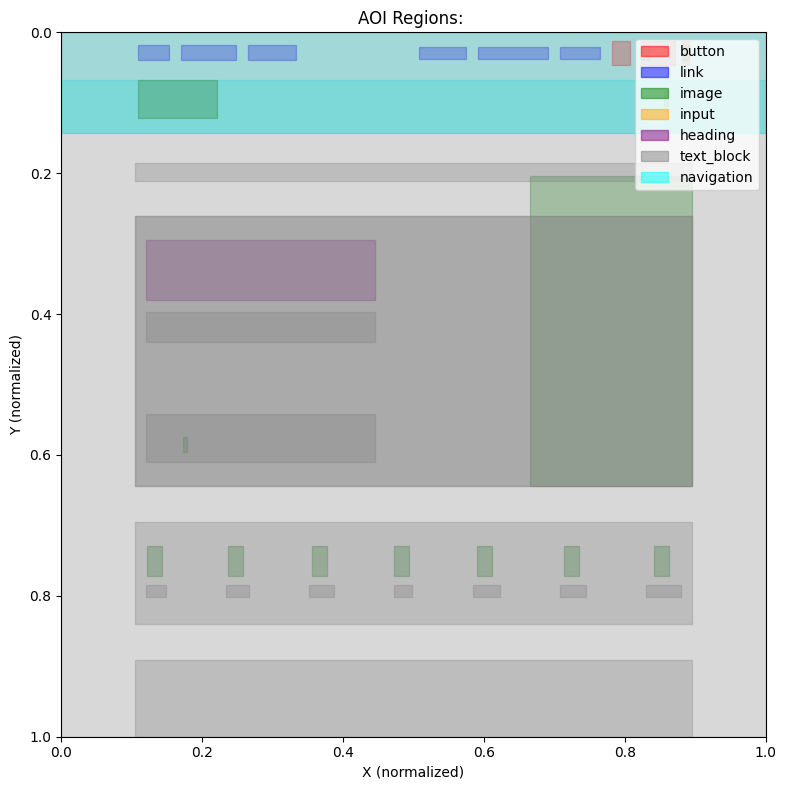

In [15]:
# Collect and visualize AOIs
with AOICollector(headless=True) as collector:
    collection = collector.collect_aois("https://ardshinbank.am/")
    visualize_aois(collection)
    plt.show()

## Integration with TobiiAnalyzer

The collected AOIs can be directly used with the `TobiiAnalyzer` for eye-tracking analysis:

In [16]:
from src.analyzers import TobiiAnalyzer

# Collect AOIs
with AOICollector(headless=True) as collector:
    collection = collector.collect_aois("https://ardshinbank.am/")
    
    # Get AOIs in analyzer-compatible format
    aoi_dict = collection.get_aoi_dict()
    
print("AOIs ready for TobiiAnalyzer:")
for name, bounds in list(aoi_dict.items())[:5]:
    print(f"  {name}: {bounds}")

AOIs ready for TobiiAnalyzer:
  navigation_tw-mb-3_0: (0.0, 0.0, 1.0, 0.05951115834218916)
  button_q-btn_1: (0.7817708333333333, 0.012752391073326248, 0.8067708333333333, 0.04569606801275239)
  button_q-btn_2: (0.8234375, 0.012752391073326248, 0.8708333333333333, 0.04569606801275239)
  button_q-btn_3: (0.88125, 0.012752391073326248, 0.8916666666666667, 0.04569606801275239)
  link_active-link_0: (0.10833333333333334, 0.018065887353878853, 0.15260416666666668, 0.039319872476089264)


In [17]:
# Example: Using with TobiiAnalyzer (requires gaze data)
# Uncomment when you have actual gaze data

# # Load your gaze data
# gaze_df = pd.read_csv("../data/raw/tobii/gaze_data.csv")

# # Create analyzer
# analyzer = TobiiAnalyzer(gaze_df)
# analyzer.preprocess()
# analyzer.detect_fixations_idt()

# # Analyze AOIs
# aoi_metrics = analyzer.analyze_aoi(aoi_dict)
# print(aoi_metrics)

# # Advanced AOI analysis (Tobii Pro Lab style)
# advanced_metrics = analyzer.analyze_aoi_advanced(aoi_dict)
# print(advanced_metrics)

## Finding AOI at Gaze Point

You can check which AOI a gaze point falls into:

In [18]:
with AOICollector(headless=True) as collector:
    collection = collector.collect_aois("https://ardshinbank.am/")
    
    # Simulate some gaze points (normalized coordinates)
    gaze_points = [
        (0.5, 0.3),  # Center-top area
        (0.2, 0.8),  # Bottom-left area
        (0.9, 0.1),  # Top-right area
    ]
    
    for x, y in gaze_points:
        aoi = collection.find_aoi_at_point(x, y, normalized=True)
        if aoi:
            print(f"Gaze ({x}, {y}) -> AOI: {aoi.name} ({aoi.element_type})")
        else:
            print(f"Gaze ({x}, {y}) -> No AOI")

Gaze (0.5, 0.3) -> AOI: video_page-background-video_0 (video)
Gaze (0.2, 0.8) -> AOI: video_page-background-video_0 (video)
Gaze (0.9, 0.1) -> AOI: navigation_tw-mb-3_0 (navigation)


## Full Page Collection (with Scrolling)

For long pages, collect AOIs while scrolling through the entire page:

In [19]:
with AOICollector(headless=True) as collector:
    # Collect AOIs from entire page (scrolls automatically)
    collections = collector.collect_aois_full_page(
        url="https://ardshinbank.am/",
        scroll_step=500  # Pixels per scroll
    )
    
    print(f"Collected from {len(collections)} scroll positions")
    
    total_aois = sum(len(c.elements) for c in collections)
    print(f"Total AOIs found: {total_aois}")

Collected from 10 scroll positions
Total AOIs found: 374


## Export AOI Summary

In [20]:
def summarize_aois(df: pd.DataFrame) -> pd.DataFrame:
    """Create a summary of collected AOIs."""
    summary = df.groupby('element_type').agg({
        'name': 'count',
        'area_normalized': ['mean', 'sum'],
        'is_interactive': 'sum',
    }).round(4)
    
    summary.columns = ['count', 'avg_area', 'total_area', 'interactive_count']
    return summary.sort_values('count', ascending=False)

In [21]:
with AOICollector(headless=True) as collector:
    collection = collector.collect_aois("https://ardshinbank.am/")
    df = collector.get_dataframe(collection)
    
    summary = summarize_aois(df)
    print("AOI Summary:")
    print(summary)

AOI Summary:
              count  avg_area  total_area interactive_count
element_type                                               
image            13    0.0088      0.1145                 0
text_block       12    0.0452      0.5422                 0
link              6    0.0013      0.0079                 6
button            3    0.0009      0.0027                 3
card              2    0.1625      0.3250                 0
navigation        2    0.1084      0.2168                 0
heading           1    0.0276      0.0276                 0
video             1    1.0000      1.0000                 0
